In [ ]:
import xarray as xr
import xesmf as xe
import matplotlib.pyplot as plt

In [5]:
ds_wrf = xr.open_dataset("/N/project/Zli_lab/gongg/regrid_WRF/wrfout_d02_2012-09-30_00:00:00")

In [6]:

# 提取第一时间步数据（注意：WRF 的数据通常有时间维度）
lat_wrf = ds_wrf["XLAT"][0, :, :]
lon_wrf = ds_wrf["XLONG"][0, :, :]
T2_wrf = ds_wrf["T2"][0, :, :] - 273.15  # 温度从开尔文转换为摄氏度

In [11]:
# 构建源数据集，并为变量添加经纬度坐标（注意维度名称可自行定义）
ds_source = xr.Dataset(
    {"T2": (("y", "x"), T2_wrf.values)},
    coords={"lat": (("y", "x"), lat_wrf.values),
            "lon": (("y", "x"), lon_wrf.values)}
)

In [14]:
# 2. 读取目标网格数据（例如 ERA5 网格）
ds_target = xr.open_dataset("/N/project/Zli_lab/gongg/regrid_WRF/ERA5.nc")

In [15]:
# 假设 ERA5 数据中的经纬度变量名称为 "latitude" 和 "longitude"
target_lat = ds_target["latitude"]
target_lon = ds_target["longitude"]

In [17]:
ds_out = xr.Dataset(
    {
        "lat": (("lat",), target_lat.values),
        "lon": (("lon",), target_lon.values)
    }
)

In [39]:
regridder = xe.Regridder(ds_source, ds_out, "bilinear", periodic=False)

In [40]:
T2_regrid = regridder(ds_source["T2"])

In [43]:
T2_regrid.to_netcdf('reg.nc')

In [34]:
T2_regrid.values.shape

(211, 341)

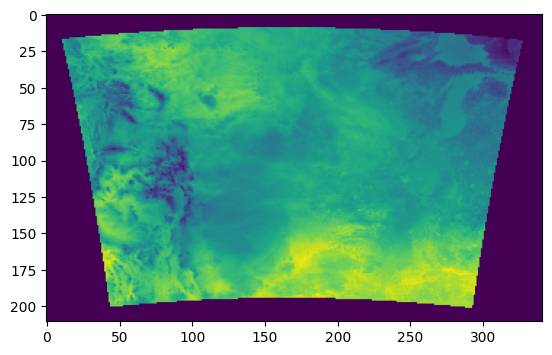

In [33]:
plt.imshow(T2_regrid.values)

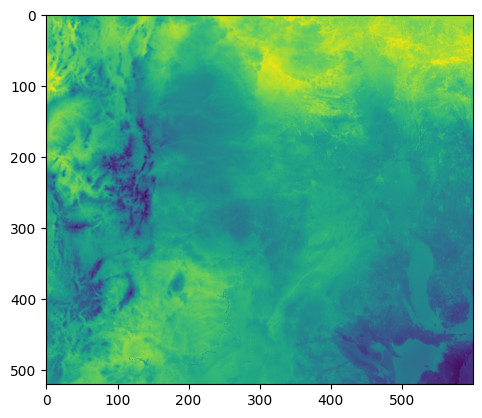

In [30]:
plt.imshow(ds_wrf.T2.values[0])